In [1]:
import pandas as pd
pd.set_option('display.width', 200)
pd.set_option('max_columns', 100)

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('https://cghub.ucsc.edu/reports/SUMMARY_STATS/LATEST_MANIFEST.tsv',
                 low_memory=False, sep='\t')

In [3]:
# Last time it's run:
import datetime
print(datetime.datetime.today().date())

2016-04-01


In [4]:
# only interested in those with state equals Live
ndf = df[(df.study == 'TCGA') & (df.library_type == 'RNA-Seq') & (df.state == 'Live') & (df.file_type != 'bam')]

In [5]:
from misc import utils

## Library types

In [6]:
utils.count(ndf, 'library_type')

,study,percent
library_type,,
RNA-Seq,11374,100.00%


## File types

In [7]:
utils.count(ndf, 'file_type')

,study,percent
file_type,,
fasta,11374,100.00%


## Diesase types

In [8]:
utils.count(ndf, ['disease', 'disease_name'])

,,study,percent
disease,disease_name,,
CNTL,CONTROLS,1,0.01%
CHOL,CHOLANGIOCARCINOMA,45,0.40%
DLBC,LYMPHOID NEOPLASM DIFFUSE LARGE B-CELL LYMPHOMA,48,0.42%
UCS,UTERINE CARCINOSARCOMA,57,0.50%
ACC,ADRENOCORTICAL CARCINOMA,79,0.69%
UVM,UVEAL MELANOMA,80,0.70%
MESO,MESOTHELIOMA,87,0.76%
KICH,KIDNEY CHROMOPHOBE,91,0.80%
THYM,THYMOMA,122,1.07%


## Number of samples

In [9]:
ndf.shape[0]

11374

## File sizes

In [10]:
# Note: the count doesn't make sense when converting to filesize, so it's shown separately
from misc.utils import sizeof_fmt
# args: pass a sep character for better readbility. See sizeof_fmt?? for more details
ndf.files_size.describe().apply(sizeof_fmt, args=(' ',))

count     11.1 KB
mean       6.2 GB
std        3.0 GB
min      278.3 MB
25%        4.6 GB
50%        5.7 GB
75%        6.9 GB
max       27.7 GB
Name: files_size, dtype: object

#### Would be interesting to find out what the smallest and biggest files are

In [11]:
cols_to_show = ['disease_name', 'sample_type_name', 'filename', 'file_type',
                'files_size', 'files_size_readable', 'library_type', 'state']
# turn off warning, http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning
ndf.is_copy = False
ndf['files_size_readable'] = ndf.files_size.apply(sizeof_fmt)
sorted_ndf = ndf.sort_values('files_size').reset_index()
sorted_ndf.ix[[0,sorted_ndf.shape[0]-1]][cols_to_show]

,disease_name,sample_type_name,filename,file_type,files_size,files_size_readable,library_type,state
0,COLON ADENOCARCINOMA,Primary solid Tumor,UNCID_2206900.559bc3f5-8d24-4740-942f-a2504739...,fasta,2.918121e+08,278.3 MB,RNA-Seq,Live
11373,OVARIAN SEROUS CYSTADENOCARCINOMA,Primary solid Tumor,TCGA-29-1699-01A-01R-1567-13_rnaseq_fastq.tar,fasta,2.972934e+10,27.7 GB,RNA-Seq,Live


## File sizes distribution

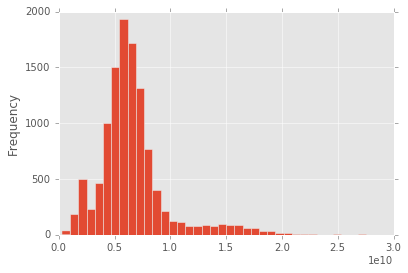

In [12]:
ndf.files_size.plot(kind='hist', bins=40)

In [13]:
sizeof_fmt(2e10)

'18.6 GB'

In [14]:
'{0:.2%}'.format(ndf[ndf.files_size > 2e10].shape[0] / float(ndf.shape[0]))

'0.46%'

So only 0.81% of the files are above 18.6 GB, and the majority are below.

### Look at a particular normal vs tumor pair

In [15]:
ndf[(ndf.aliquot_id == '469f052a-477e-498a-ba3b-f288dcbc306f') | (ndf.aliquot_id == '19c97e3d-f5af-4301-92f4-be8ac9e27427')]

,study,barcode,disease,disease_name,sample_type,sample_type_name,analyte_type,library_type,center,center_name,platform,platform_name,assembly,filename,files_size,checksum,analysis_id,aliquot_id,participant_id,sample_id,tss_id,sample_accession,published,uploaded,modified,state,sample_type_code,analyte_type_code,platform_full_name,file_type,reason,reagent_vendor,reagent_name,catalog_number,is_custom,target_file_url,probe_file_url,files_size_readable
33965,TCGA,TCGA-BC-A10Q-11A-11R-A131-07,LIHC,LIVER HEPATOCELLULAR CARCINOMA,NT,Solid Tissue Normal,RNA,RNA-Seq,UNC-LCCC,NaN,ILLUMINA,Illumina,unaligned,UNCID_2207989.469f052a-477e-498a-ba3b-f288dcbc...,5.833322e+09,ed9eb3a96c2b37aabc75df35aef38196,66b0260b-f242-4eea-9c9f-a96e1ec7f0f9,469f052a-477e-498a-ba3b-f288dcbc306f,dfa15fbe-bb14-40ce-afc6-70694112e3e2,5d3bf988-3331-4412-bc17-b8f4650a8623,BC,NaN,2013-09-30,2013-09-30,2013-09-30,Live,11,R,Illumina HiSeq 2000,fasta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.4 GB
33966,TCGA,TCGA-BC-A10Q-01A-11R-A131-07,LIHC,LIVER HEPATOCELLULAR CARCINOMA,TP,Primary solid Tumor,RNA,RNA-Seq,UNC-LCCC,NaN,ILLUMINA,Illumina,unaligned,UNCID_2207997.19c97e3d-f5af-4301-92f4-be8ac9e2...,5.242180e+09,98232bfea569de53517aa9d06f2f2781,1e2cc863-1123-451c-a295-0323fb421188,19c97e3d-f5af-4301-92f4-be8ac9e27427,dfa15fbe-bb14-40ce-afc6-70694112e3e2,bf225dc1-4309-4304-849e-cbcc23c8442c,BC,NaN,2013-09-30,2013-09-30,2013-09-30,Live,01,R,Illumina HiSeq 2000,fasta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9 GB
